In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [2]:
# Carregar o arquivo CSV
df = pd.read_csv(r"/content/previsao_de_renda_II.csv")

In [ ]:
# Exibir informações básicas sobre o DataFrame antes da substituição
print("Informações antes da substituição dos valores missing:")
print(df.info())

Informações antes da substituição dos valores missing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   data_ref               750000 non-null  object 
 1   index                  750000 non-null  int64  
 2   sexo                   750000 non-null  object 
 3   posse_de_veiculo       750000 non-null  object 
 4   posse_de_imovel        750000 non-null  object 
 5   qtd_filhos             750000 non-null  int64  
 6   tipo_renda             750000 non-null  object 
 7   educacao               750000 non-null  object 
 8   estado_civil           750000 non-null  object 
 9   tipo_residencia        750000 non-null  object 
 10  idade                  750000 non-null  int64  
 11  tempo_emprego          624240 non-null  float64
 12  qt_pessoas_residencia  750000 non-null  float64
 13  renda                  750000 non-

In [3]:
# Substituindo todos os NaN por 0
df.fillna(0, inplace=True)

In [4]:
# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe())


Estatísticas descritivas:
               index     qtd_filhos          idade  tempo_emprego  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean     8319.025636       0.433267      43.796907       6.447288   
std      4810.382817       0.738516      11.229454       6.749878   
min         0.000000       0.000000      22.000000       0.000000   
25%      4147.000000       0.000000      34.000000       1.183562   
50%      8324.000000       0.000000      43.000000       4.690411   
75%     12490.000000       1.000000      53.000000       9.093151   
max     16649.000000      14.000000      68.000000      42.906849   

       qt_pessoas_residencia         renda  
count          750000.000000  7.500000e+05  
mean                2.212315  2.397742e+04  
std                 0.903041  9.039973e+04  
min                 1.000000  9.530000e+01  
25%                 2.000000  3.469370e+03  
50%                 2.000000  7.929980e+03  
75%                 3.000000  1.8647

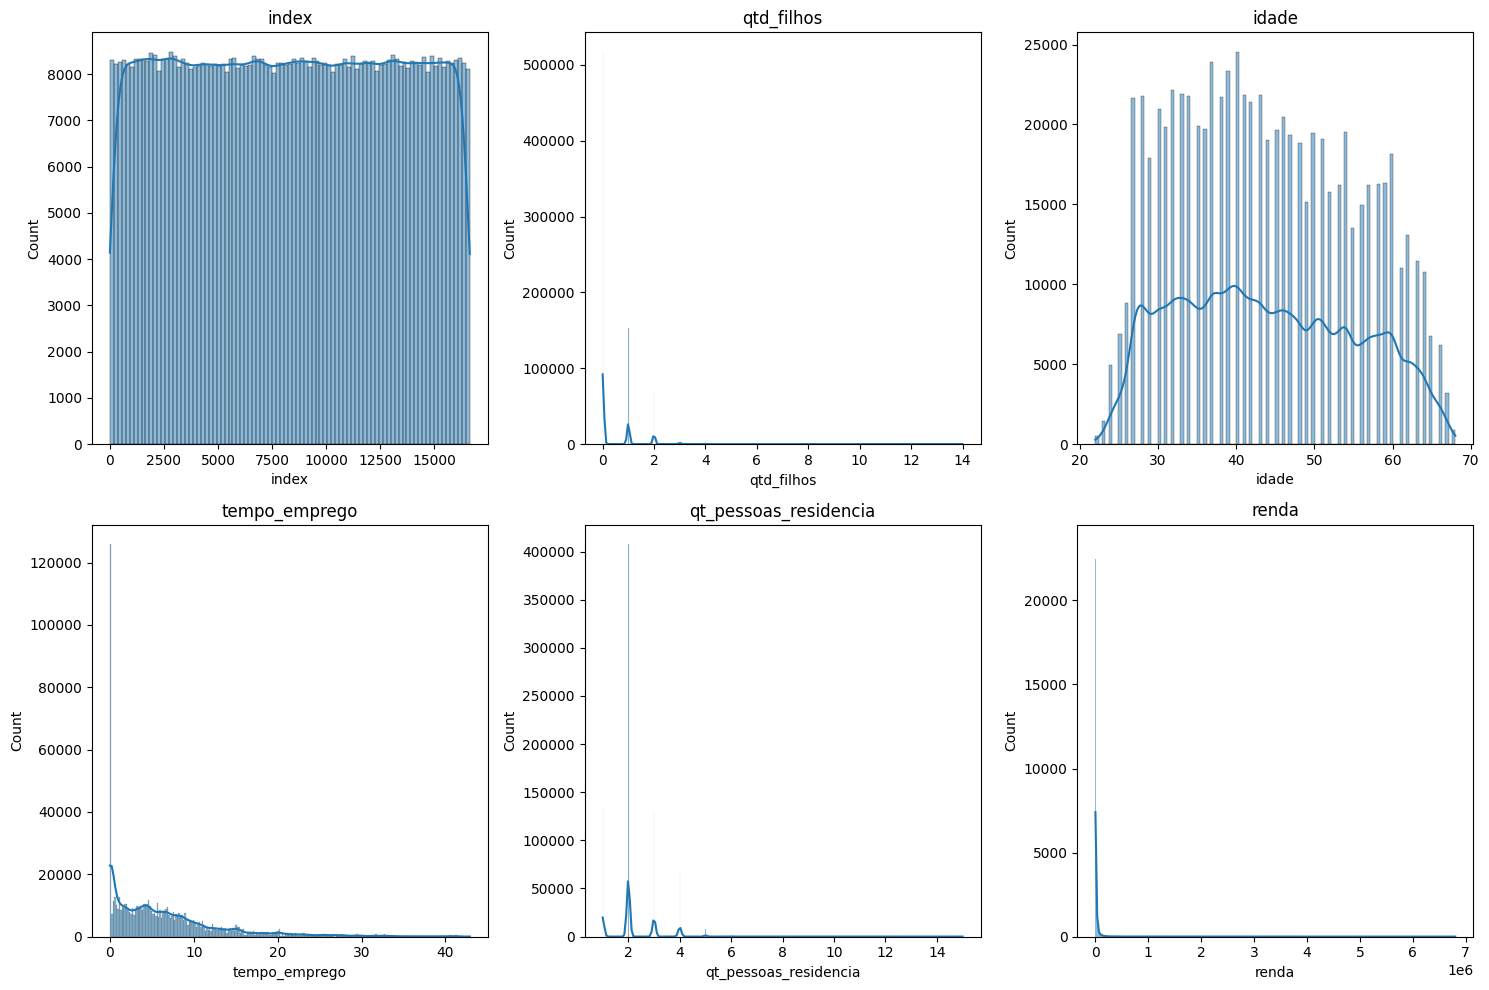

In [5]:
# Visualizar a distribuição das variáveis numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns
n_cols = 3
n_rows = (len(numeric_columns) - 1) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

<ipython-input-6-89a6b61c7412>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
<ipython-input-6-89a6b61c7412>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])


Could not convert column sexo to numeric. Dropping it from correlation matrix.
Could not convert column posse_de_veiculo to numeric. Dropping it from correlation matrix.


<ipython-input-6-89a6b61c7412>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
<ipython-input-6-89a6b61c7412>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])


Could not convert column posse_de_imovel to numeric. Dropping it from correlation matrix.
Could not convert column tipo_renda to numeric. Dropping it from correlation matrix.


<ipython-input-6-89a6b61c7412>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
<ipython-input-6-89a6b61c7412>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])


Could not convert column educacao to numeric. Dropping it from correlation matrix.
Could not convert column estado_civil to numeric. Dropping it from correlation matrix.


<ipython-input-6-89a6b61c7412>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])


Could not convert column tipo_residencia to numeric. Dropping it from correlation matrix.


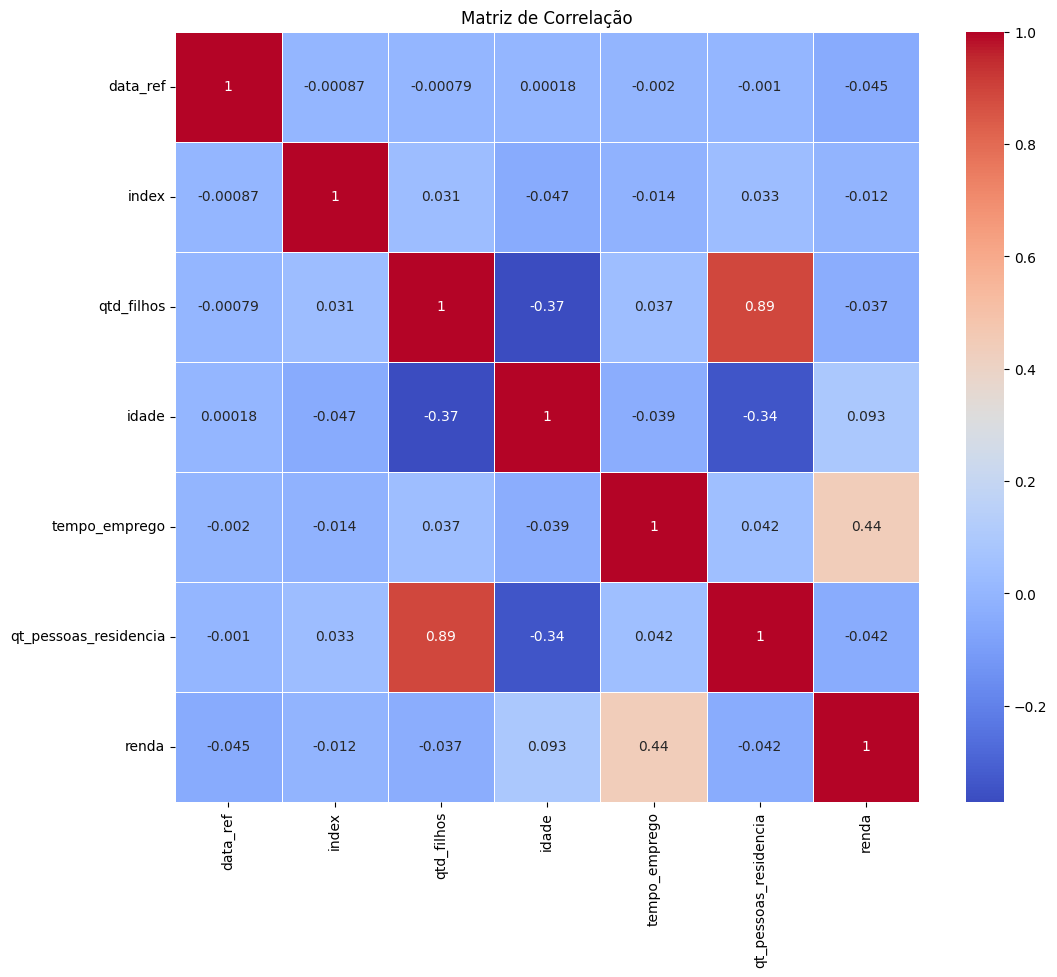


Análise concluída.


In [6]:
# Matriz de correlação
# Convert date columns to datetime objects and other non-numeric columns to numeric values.
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is of object type
        try:
            df[col] = pd.to_datetime(df[col])
            df[col] = df[col].apply(lambda x: x.timestamp()) # Convert datetime to numerical timestamp
        except:
            try:
                df[col] = pd.to_numeric(df[col]) #Try to convert to numeric values if possible
            except:
                print(f"Could not convert column {col} to numeric. Dropping it from correlation matrix.")
                df = df.drop(col, axis=1) # Drop the column if it cannot be converted
            pass # Skip if conversion fails

correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

print("\nAnálise concluída.")

In [7]:
# Verificar se existe uma coluna de data
if 'data' in df.columns:
    # Converter a coluna de data para datetime
    df['data'] = pd.to_datetime(df['data'])

    # Ordenar o DataFrame pela data
    df = df.sort_values('data')

    # Identificar a data que separa os últimos 3 meses
    data_corte = df['data'].max() - pd.DateOffset(months=3)

    # Separar os dados
    train = df[df['data'] <= data_corte]
    test = df[df['data'] > data_corte]
else:
    # Se não houver coluna de data, usar os últimos 25% como teste
    train, test = train_test_split(df, test_size=0.25, shuffle=False)

# Remover a coluna de data, se existir
if 'data' in train.columns:
    train = train.drop('data', axis=1)
    test = test.drop('data', axis=1)

# Imprimir informações sobre os conjuntos de treino e teste
print("Tamanho do conjunto de treino:", train.shape)
print("Tamanho do conjunto de teste:", test.shape)

Tamanho do conjunto de treino: (562500, 7)
Tamanho do conjunto de teste: (187500, 7)


In [8]:
# Verificar a distribuição da variável alvo (assumindo que seja 'renda')
if 'renda' in df.columns:
    print("\nEstatísticas da variável 'renda':")
    print("Treino:")
    print(train['renda'].describe())
    print("\nTeste:")
    print(test['renda'].describe())

# Salvar os conjuntos de treino e teste em arquivos CSV separados
train.to_csv('train_set.csv', index=False)
test.to_csv('test_set.csv', index=False)

print("\nConjuntos de treino e teste foram salvos em 'train_set.csv' e 'test_set.csv'.")


Estatísticas da variável 'renda':
Treino:
count    5.625000e+05
mean     2.915365e+04
std      1.026924e+05
min      1.412500e+02
25%      4.920320e+03
50%      1.044465e+04
75%      2.295128e+04
max      6.802261e+06
Name: renda, dtype: float64

Teste:
count    1.875000e+05
mean     8.448747e+03
std      2.701402e+04
min      9.530000e+01
25%      1.736720e+03
50%      3.289295e+03
75%      6.722950e+03
max      1.639469e+06
Name: renda, dtype: float64

Conjuntos de treino e teste foram salvos em 'train_set.csv' e 'test_set.csv'.


In [9]:
# Separar features (X) e variável alvo (y)
X = df.drop('renda', axis=1)  # Assumindo que 'renda' é a variável alvo
y = df['renda']

In [10]:
# Separar os dados em conjuntos de treino e teste (75% treino, 25% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
# Criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Fazer previsões
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [13]:
# Calcular R² e R²-ajustado para o conjunto de treino
r2_train = r2_score(y_train, y_train_pred)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
r2_adj_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p_train - 1)

In [14]:
# Calcular R² e R²-ajustado para o conjunto de teste
r2_test = r2_score(y_test, y_test_pred)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
r2_adj_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_test - 1)

print(f"R² (Treino): {r2_train:.4f}")
print(f"R²-ajustado (Treino): {r2_adj_train:.4f}")
print(f"R² (Teste): {r2_test:.4f}")
print(f"R²-ajustado (Teste): {r2_adj_test:.4f}")

R² (Treino): 0.2093
R²-ajustado (Treino): 0.2093
R² (Teste): 0.2174
R²-ajustado (Teste): 0.2173


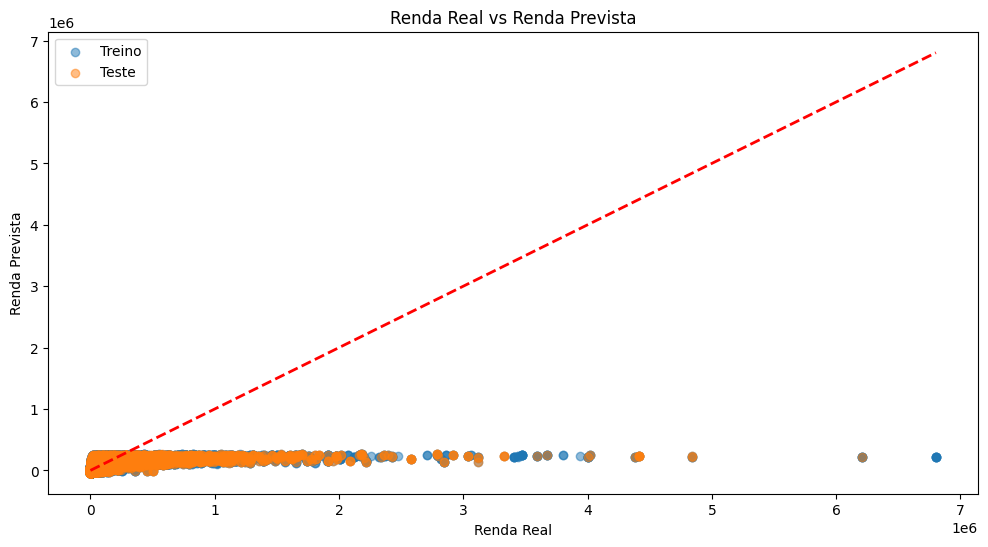

In [15]:
# Visualizar resultados
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Treino')
plt.scatter(y_test, y_test_pred, alpha=0.5, label='Teste')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Renda Real')
plt.ylabel('Renda Prevista')
plt.title('Renda Real vs Renda Prevista')
plt.legend()
plt.show()

In [16]:
# Importância das features
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nImportância das Features:")
print(feature_importance)


Importância das Features:
                 feature   importance
4          tempo_emprego  6013.968223
5  qt_pessoas_residencia  5864.639118
2             qtd_filhos  4571.489052
3                  idade   844.766835
1                  index     0.012642
0               data_ref     0.000353


In [17]:
# Calcular o log da renda
df['log_renda'] = np.log(df['renda'])

# Categorizar tempo_emprego em 20 quantis
# Set duplicates='drop' to drop duplicate bin edges
df['tempo_emprego_cat'] = pd.qcut(df['tempo_emprego'], q=20, labels=False, duplicates='drop')

In [18]:
# Criar tabela de perfil
profile_table = df.groupby('tempo_emprego_cat').agg({
    'tempo_emprego_cat': 'count',
    'log_renda': 'mean',
    'tempo_emprego': 'mean'
}).rename(columns={
    'tempo_emprego_cat': 'count',
    'log_renda': 'mean_log_renda',
    'tempo_emprego': 'mean_tempo_emprego'
}).reset_index()

# Exibir a tabela de perfil
print(profile_table)

    tempo_emprego_cat   count  mean_log_renda  mean_tempo_emprego
0                   0  150180        8.684055            0.067347
1                   1   37612        8.185400            0.906571
2                   2   37244        8.293427            1.545839
3                   3   37634        8.362504            2.233879
4                   4   37570        8.493867            3.035638
5                   5   37262        8.579429            3.748364
6                   6   37516        8.664214            4.392537
7                   7   37555        8.722957            5.071582
8                   8   37598        8.894583            5.910152
9                   9   37462        8.944594            6.719942
10                 10   37553        9.078882            7.614828
11                 11   37584        9.191291            8.578116
12                 12   37282        9.366707            9.748810
13                 13   37676        9.538122           11.391979
14        

In [19]:
# Salvar a tabela de perfil como CSV
profile_table.to_csv('profile_table.csv', index=False)

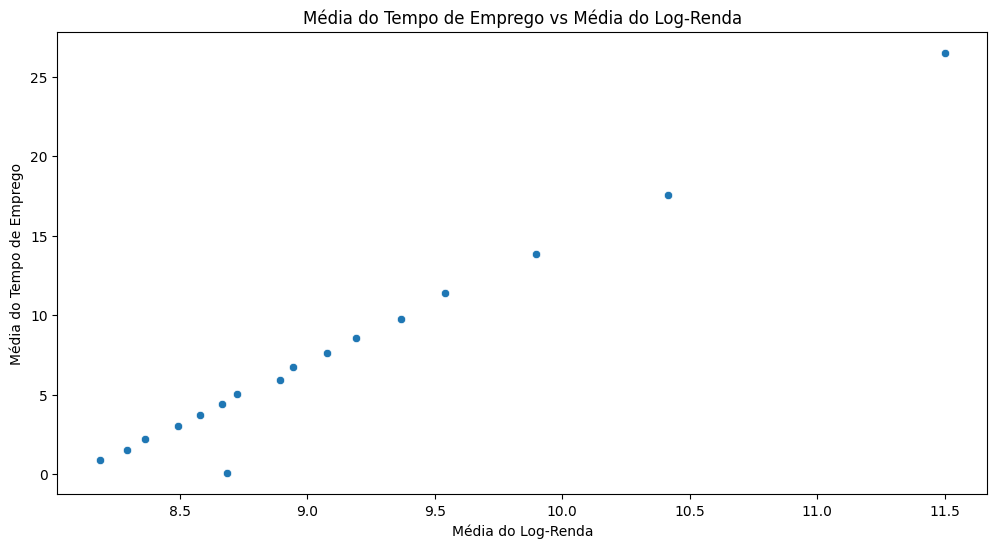

In [20]:
# Criar o gráfico
plt.figure(figsize=(12, 6))
sns.scatterplot(x='mean_log_renda', y='mean_tempo_emprego', data=profile_table)
plt.title('Média do Tempo de Emprego vs Média do Log-Renda')
plt.xlabel('Média do Log-Renda')
plt.ylabel('Média do Tempo de Emprego')
plt.show()

In [21]:
# Calcular a correlação
correlation = profile_table['mean_log_renda'].corr(profile_table['mean_tempo_emprego'])
print(f"Correlação entre média do log-renda e média do tempo de emprego: {correlation:.4f}")

Correlação entre média do log-renda e média do tempo de emprego: 0.9867


In [22]:
df.head()

,data_ref,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda,tempo_emprego_cat
0,1.420070e+09,5762,0,47,16.717808,2.0,11138.14,9.318131,15
1,1.420070e+09,1279,0,30,9.600000,2.0,2424.81,7.793508,12
2,1.420070e+09,14111,0,28,8.208219,2.0,13749.66,9.528769,11
3,1.420070e+09,8189,2,44,1.301370,4.0,2361.84,7.767196,2
4,1.420070e+09,1830,2,33,1.254795,4.0,790.78,6.673020,2


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   data_ref               750000 non-null  float64
 1   index                  750000 non-null  int64  
 2   qtd_filhos             750000 non-null  int64  
 3   idade                  750000 non-null  int64  
 4   tempo_emprego          750000 non-null  float64
 5   qt_pessoas_residencia  750000 non-null  float64
 6   renda                  750000 non-null  float64
 7   log_renda              750000 non-null  float64
 8   tempo_emprego_cat      750000 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 51.5 MB


In [24]:
# Supondo que você tenha um DataFrame df
df['qtd_filhos'] = pd.to_datetime(df['qtd_filhos'])
df.set_index('qtd_filhos', inplace=True)

In [25]:
# Ajustar o modelo ARIMA
model = ARIMA(df['tempo_emprego'], order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [26]:
# Fazer previsões
forecast = model_fit.forecast(steps=10)  # Prever os próximos 10 períodos

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


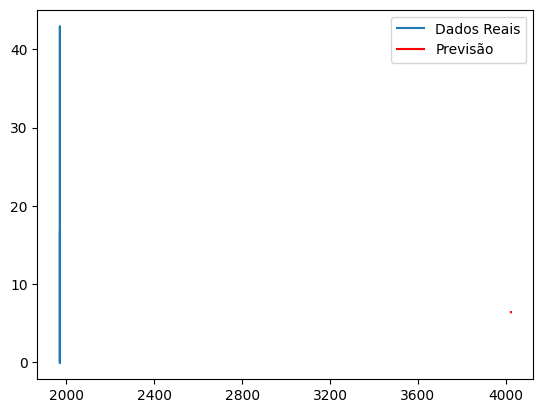

In [27]:
# Visualizar resultados
plt.plot(df['tempo_emprego'], label='Dados Reais')
plt.plot(forecast, label='Previsão', color='red')
plt.legend()
plt.show()

In [28]:
# Supondo que você tenha um DataFrame chamado df
df['data_ref'] = pd.to_datetime(df['data_ref'])

In [29]:
# Adicionar uma variável categórica baseada em períodos
df['tempo_emprego_cat'] = pd.cut(df['data_ref'].dt.month, bins=[0, 3, 6, 9, 12], labels=['Q1', 'Q2', 'Q3', 'Q4'], right=False)

In [30]:
q1_data = df[df['tempo_emprego_cat'] == 'Q1']

In [31]:
print(q1_data.head())

                                                   data_ref  index  idade  \
qtd_filhos                                                                  
1970-01-01 00:00:00.000000000 1970-01-01 00:00:01.420070400   5762     47   
1970-01-01 00:00:00.000000000 1970-01-01 00:00:01.420070400   1279     30   
1970-01-01 00:00:00.000000000 1970-01-01 00:00:01.420070400  14111     28   
1970-01-01 00:00:00.000000002 1970-01-01 00:00:01.420070400   8189     44   
1970-01-01 00:00:00.000000002 1970-01-01 00:00:01.420070400   1830     33   

                               tempo_emprego  qt_pessoas_residencia     renda  \
qtd_filhos                                                                      
1970-01-01 00:00:00.000000000      16.717808                    2.0  11138.14   
1970-01-01 00:00:00.000000000       9.600000                    2.0   2424.81   
1970-01-01 00:00:00.000000000       8.208219                    2.0  13749.66   
1970-01-01 00:00:00.000000002       1.301370           

In [32]:
print(q1_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 750000 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   data_ref               750000 non-null  datetime64[ns]
 1   index                  750000 non-null  int64         
 2   idade                  750000 non-null  int64         
 3   tempo_emprego          750000 non-null  float64       
 4   qt_pessoas_residencia  750000 non-null  float64       
 5   renda                  750000 non-null  float64       
 6   log_renda              750000 non-null  float64       
 7   tempo_emprego_cat      750000 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(4), int64(2)
memory usage: 46.5 MB
None


In [33]:
# Aplicar LOWESS
# Converter 'tempo_emprego_cat' para uma representação numérica
df['tempo_emprego_num'] = df['tempo_emprego_cat'].map({'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4})

lowess = sm.nonparametric.lowess(df['tempo_emprego_num'], df['data_ref'], frac=0.2)

In [34]:
df['data_ref'] = df['data_ref'].astype(int)

In [35]:
# Alterar a coluna 'tempo_emprego_cat' para uma representação numérica
df['tempo_emprego_num'] = df['tempo_emprego_cat'].map({'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4})

# Agora você pode trabalhar com a representação numérica
df['tempo_emprego_num'] = df['tempo_emprego_num'].astype(int)

In [36]:
df[['tempo_emprego_num', 'data_ref']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 750000 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   tempo_emprego_num  750000 non-null  int64
 1   data_ref           750000 non-null  int64
dtypes: int64(2)
memory usage: 17.2 MB


In [37]:
# Criar um DataFrame para os resultados do LOWESS
lowess_df = pd.DataFrame(lowess, columns=['data_ref', 'tempo_emprego_num'])

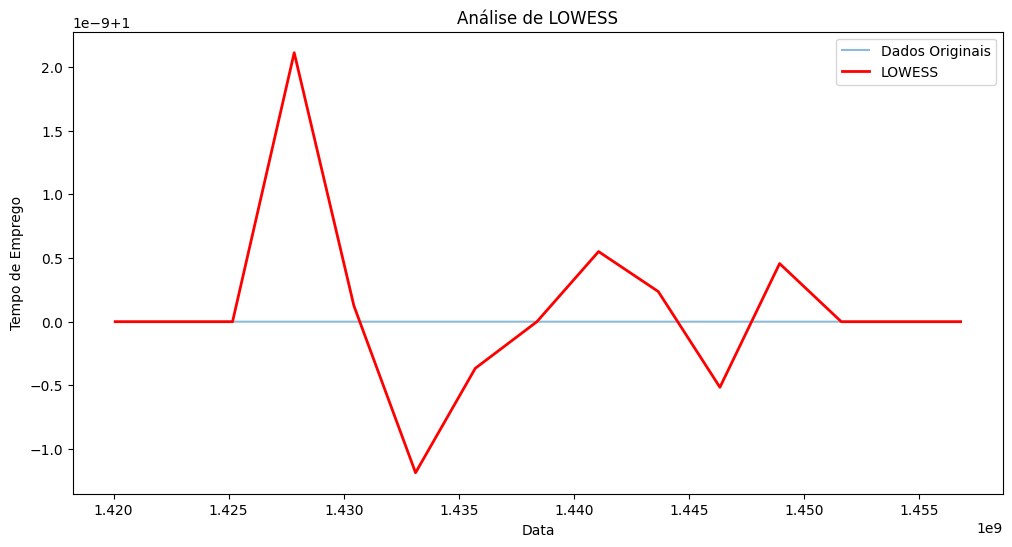

In [38]:
# Visualizar os resultados
plt.figure(figsize=(12, 6))
plt.plot(df['data_ref'], df['tempo_emprego_num'], label='Dados Originais', alpha=0.5)
plt.plot(lowess_df['data_ref'], lowess_df['tempo_emprego_num'], color='red', label='LOWESS', linewidth=2)
plt.title('Análise de LOWESS')
plt.xlabel('Data')
plt.ylabel('Tempo de Emprego')
plt.legend()
plt.show()